# Importando e subindo arquivo

In [ ]:
from datetime import datetime
import numpy as np             
import pandas as pd            
import matplotlib.pylab as plt
from google.colab import files
%matplotlib inline
from matplotlib.pylab import rcParams
from google.colab import drive
import math
rcParams['figure.figsize'] = 10, 6

In [ ]:
#arquivo = 'all_stocks_5yr.csv'
#up = files.upload()
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/all_stocks_5yr.csv')

Mounted at /content/drive


In [ ]:
df.head(3)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL


In [ ]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


# Escolhendo qual ação vamos analisar

In [ ]:
df['Name'].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [ ]:
moto = df.loc[df['Name'] == 'MSI']
moto.head()

,date,open,high,low,close,volume,Name
391457,2013-02-08,60.20,60.4800,59.19,60.30,1226944,MSI
391458,2013-02-11,60.36,61.0350,60.21,60.90,1080309,MSI
391459,2013-02-12,60.79,61.0600,60.47,60.83,941229,MSI
391460,2013-02-13,61.00,61.3999,60.79,60.81,1489324,MSI
391461,2013-02-14,60.52,61.2800,60.20,61.12,1765526,MSI


# Checando a base

- Substituindo a data do tipo objeto para datetime;
- Colocando a data com índice;
- Preenchendo os dias que não foram cadastrados;
- Escolhendo a coluna de target, no caso a 'close';


In [ ]:
moto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 391457 to 392715
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 78.7+ KB


In [ ]:
#Mudando de objeto para datetime
moto_df = moto.copy()
moto_df.loc[:,'date'] = pd.to_datetime(moto.loc[:,'date'], format="%Y/%m/%d")
moto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 391457 to 392715
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1259 non-null   datetime64[ns]
 1   open    1259 non-null   float64       
 2   high    1259 non-null   float64       
 3   low     1259 non-null   float64       
 4   close   1259 non-null   float64       
 5   volume  1259 non-null   int64         
 6   Name    1259 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 78.7+ KB


In [ ]:
# Botando a data como index
moto_df.index = moto_df['date']
moto_df.drop(columns='date',inplace = True)
moto_df.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,60.20,60.4800,59.19,60.30,1226944,MSI
2013-02-11,60.36,61.0350,60.21,60.90,1080309,MSI
2013-02-12,60.79,61.0600,60.47,60.83,941229,MSI
2013-02-13,61.00,61.3999,60.79,60.81,1489324,MSI
2013-02-14,60.52,61.2800,60.20,61.12,1765526,MSI


In [ ]:
MSI = moto_df[["close"]].copy()
MSI.head()

,close
date,
2013-02-08,60.30
2013-02-11,60.90
2013-02-12,60.83
2013-02-13,60.81
2013-02-14,61.12


In [ ]:
#Hora = BitCoin.resample('H').mean().copy()
#Diario = BitCoin.resample('D').mean().copy()
#Semanal = BitCoin.resample('W').mean().copy()
#Mensal = BitCoin.resample('M').mean().copy()

In [ ]:
df_msi = MSI.resample('D').mean().copy()
df_msi.fillna(method= "ffill", inplace = True)
df_msi.head()

,close
date,
2013-02-08,60.30
2013-02-09,60.30
2013-02-10,60.30
2013-02-11,60.90
2013-02-12,60.83


In [ ]:
df_msi.insert(loc=0, column = "Ano", value = df_msi.index.year)
df_msi["Mes"] = df_msi.index.month
df_msi["Dia"] = df_msi.index.day
# Dia do Ano
df_msi["Dia_do_Ano"] = df_msi.index.dayofyear
# Semanais
df_msi["Semana_do_Ano"] = df_msi.index.week
df_msi["Dia_da_Semana"] = df_msi.index.dayofweek
df_msi["Dia_da_Semana"] = df_msi["Dia_da_Semana"] + 1
df_msi.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  import sys


,Ano,close,Mes,Dia,Dia_do_Ano,Semana_do_Ano,Dia_da_Semana
date,,,,,,,
2013-02-08,2013,60.30,2,8,39,6,5
2013-02-09,2013,60.30,2,9,40,6,6
2013-02-10,2013,60.30,2,10,41,6,7
2013-02-11,2013,60.90,2,11,42,7,1
2013-02-12,2013,60.83,2,12,43,7,2


# Visualizando Ciclos

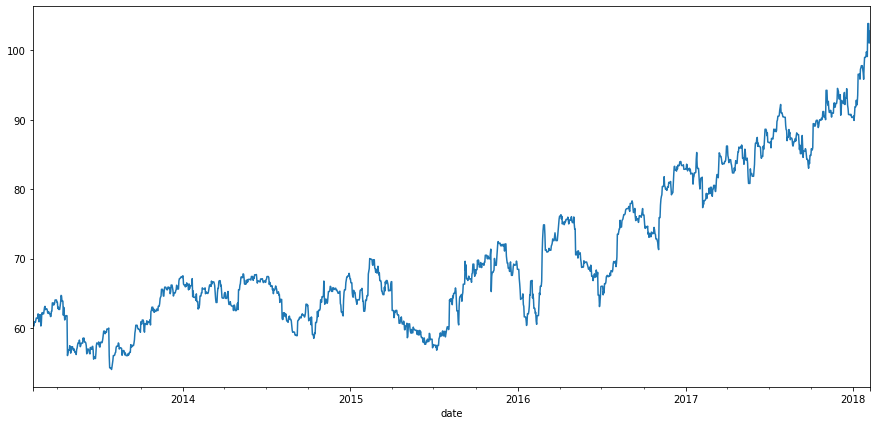

In [ ]:
plt.figure(figsize=(15, 7))
df_msi['close'].plot()

In [ ]:
#plt.figure(figsize=(15, 7))
#df_msi.groupby('Ano')['close'].mean().plot.bar()

In [ ]:
#plt.figure(figsize=(15, 7))
#df_msi.groupby('Mes')['close'].mean().plot.bar()

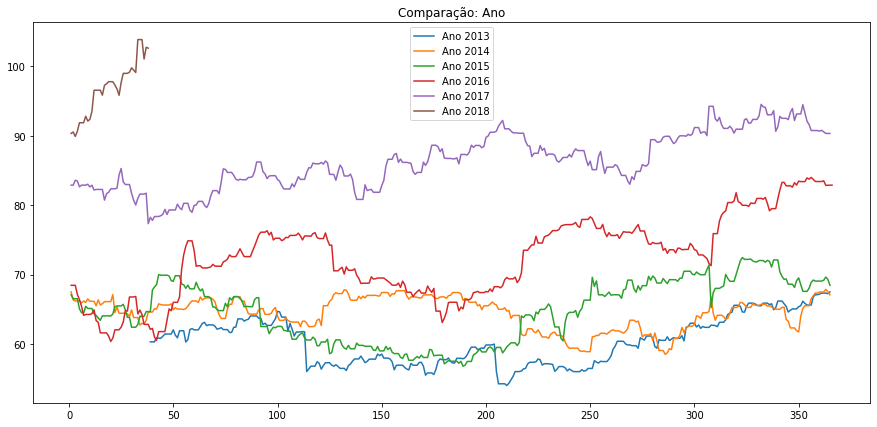

In [ ]:
plt.figure(figsize = (15,7))
for i in df_msi["Ano"].unique():
        plt.plot(df_msi[df_msi["Ano"] == i]["Dia_do_Ano"]\
             , df_msi[df_msi["Ano"] == i]["close"], label = 'Ano ' + str(i))
plt.legend(loc = 'best')
plt.title('Comparação: Ano' )
plt.show()

# Ajustando a coluna de target para o final do DataFrame

In [ ]:
df_msi.head(2)

,Ano,close,Mes,Dia,Dia_do_Ano,Semana_do_Ano,Dia_da_Semana
date,,,,,,,
2013-02-08,2013,60.3,2,8,39,6,5
2013-02-09,2013,60.3,2,9,40,6,6


In [ ]:
df_msi_close = df_msi['close'].copy()
df_msi = df_msi.drop(columns = 'close')
df_msi['close'] = df_msi_close.values
df_msi

,Ano,Mes,Dia,Dia_do_Ano,Semana_do_Ano,Dia_da_Semana,close
date,,,,,,,
2013-02-08,2013,2,8,39,6,5,60.30
2013-02-09,2013,2,9,40,6,6,60.30
2013-02-10,2013,2,10,41,6,7,60.30
2013-02-11,2013,2,11,42,7,1,60.90
2013-02-12,2013,2,12,43,7,2,60.83
...,...,...,...,...,...,...,...
2018-02-03,2018,2,3,34,5,6,103.87
2018-02-04,2018,2,4,35,5,7,103.87
2018-02-05,2018,2,5,36,6,1,101.06


#Gerando arquivo - Sem Sazonalidade

In [ ]:
df_msi.to_csv("Base_MSI_sem_sazonalidade.csv")
!cp Base_MSI_sem_sazonalidade.csv "drive/My Drive/"

# Get Dummies para Sazonalidade

## Meses

In [ ]:
df_mes = pd.get_dummies(df_msi["Mes"], drop_first=True, prefix="Mes")
df_msi = pd.concat([df_msi, df_mes], axis = 1)
#df_msi.head(2)

## Dias

In [ ]:
df_dia = pd.get_dummies(df_msi["Dia"], drop_first=True, prefix="Dia")
df_msi = pd.concat([df_msi, df_dia], axis = 1)
#df_msi.head(2)

##Semana

In [ ]:
df_sem = pd.get_dummies(df_msi["Dia_da_Semana"], drop_first=True, prefix="Dia_da_Semana")
df_msi = pd.concat([df_msi, df_sem], axis = 1)
df_msi.drop(columns= 'Dia_da_Semana', errors='ignore', inplace = True)
#df_msi.head(2)

## Visualização da Base

In [ ]:
df_msi_close = df_msi['close'].copy()
df_msi = df_msi.drop(columns = 'close')
df_msi['close'] = df_msi_close.values
df_msi.head(2)

,Ano,Mes,Dia,Dia_do_Ano,Semana_do_Ano,Mes_2,Mes_3,Mes_4,Mes_5,Mes_6,...,Dia_29,Dia_30,Dia_31,Dia_da_Semana_2,Dia_da_Semana_3,Dia_da_Semana_4,Dia_da_Semana_5,Dia_da_Semana_6,Dia_da_Semana_7,close
date,,,,,,,,,,,,,,,,,,,,,
2013-02-08,2013,2,8,39,6,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,60.3
2013-02-09,2013,2,9,40,6,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,60.3


# Gerando arquivo da Base - Com Sazonalidade

In [ ]:
df_msi.to_csv("Base_MSI_com_sazonalidade.csv")
!cp Base_MSI_com_sazonalidade.csv "drive/My Drive/"